In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

import keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Dataset A

In [ ]:
df1 = pd.read_csv('spam_or_ham_and_sentiment_version1.csv')
df1 = df1[['Comment in English','Sentiment']]
df1.rename({'Comment in English':'Comments'},axis=1, inplace =True) # Rename "Sentiment" Column
df1['Sentiment'] = df1['Sentiment'].factorize()[0] # Convert the "Sentiment" column to unique numbers
df1 = df1[df1.Sentiment != 2] # Remove Neutral Label Rows
df1 = df1.reset_index(drop=True)
df1

,Comments,Sentiment
0,Imagine car size potholes on road.,0
1,This defeats the definition of cars,0
2,When you realize the bottom of the earth is em...,1
3,Hyperpod?,0
4,"We have to learn this for a school project, so...",1
...,...,...
3995,im just getting fuckin old but the world allwa...,0
3996,Gotta start somewhere before making tunnels on...,0
3997,Could be the start of a historical company,0
3998,No.3,0


### Dataset B

In [ ]:
df2 = pd.read_csv('youTubeSent.csv')
df2 = df2[['Comments','Positive', 'Negative']]
df2['Sentiment'] = df2.apply(lambda x: 1 if x['Positive'] == 1 else 0 if x['Negative'] == 1 else -1, axis=1) # Combine Positive and Negative Column
df2 = df2[df2.Sentiment != -1] # Remove Neutral Label Rows
df2 = df2.drop(['Positive', 'Negative'], axis=1)
df2 = df2.reset_index(drop=True)
df2

,Comments,Sentiment
0,I love you Cory. You're my favorite.,1
1,I love u cory,1
2,Congratulations for 50.5 Million subscribers,1
3,You are awesome,1
4,I love you Cory,1
...,...,...
663,Here comes the women and people of color talk ...,0
664,"It's crazy, so long nobody has travelled there.",0
665,Working for CNN must feel like shit.. Shilling...,0
666,All left Wang media is bad,0


### Combine Dataset A & B

In [ ]:
df = df1.copy()
df = df.append(df2) # Append dataset B below Dataset A
df = df.reset_index(drop=True)
df

<ipython-input-27-e043c3835154>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2) # Append dataset B below Dataset A


,Comments,Sentiment
0,Imagine car size potholes on road.,0
1,This defeats the definition of cars,0
2,When you realize the bottom of the earth is em...,1
3,Hyperpod?,0
4,"We have to learn this for a school project, so...",1
...,...,...
4663,Here comes the women and people of color talk ...,0
4664,"It's crazy, so long nobody has travelled there.",0
4665,Working for CNN must feel like shit.. Shilling...,0
4666,All left Wang media is bad,0


STOP WORDS

In [ ]:
import re
import string
from nltk.corpus import stopwords
import nltk


In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop = set(stopwords.words('english'))
#removing punctuation marks
punctuation = list(string.punctuation)
#adding punctuations to the list of stop words 
stop.update(punctuation)

#Removing the square brackets
def remove_brackets(Comments):
    return re.sub('\[[^]]*\]', '', Comments)

# Removing URL's
def remove_urls(Comments):
    return re.sub(r'http\S+', '', Comments)

In [ ]:
#Removing the stopwords from text
def remove_stopwords(Comments):
    final_text = []
    Comments = Comments.lower()
    for i in Comments.split():
        if i.strip() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def clean_text(Comments):
    Comments = remove_brackets(Comments)
    Comments = remove_urls(Comments)
    Comments = remove_stopwords(Comments)
    return Comments

#Apply function on text column
df['Comments']=df['Comments'].apply(clean_text)
df['Comments']

0                         imagine car size potholes road.
1                                 defeats definition cars
2                 realize bottom earth empty....... dead?
3                                               hyperpod?
4                          learn school project, boring 😗
                              ...                        
4663    comes women people color talk shut fuck enjoy ...
4664                  crazy, long nobody travelled there.
4665    working cnn must feel like shit.. shilling wor...
4666                                  left wang media bad
4667                    fox news good left wang media bad
Name: Comments, Length: 4668, dtype: object

STEMMING

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stemming(Comments):
    stemmed_Comments = re.sub('[^a-zA-Z]',' ',Comments)
    stemmed_Comments = stemmed_Comments.split()
    stemmed_Comments = ' '.join(stemmed_Comments)
    return stemmed_Comments

In [ ]:
df['Comments'] = df['Comments'].apply(stemming)
print(df['Comments'])

0                          imagine car size potholes road
1                                 defeats definition cars
2                         realize bottom earth empty dead
3                                                hyperpod
4                             learn school project boring
                              ...                        
4663    comes women people color talk shut fuck enjoy ...
4664                    crazy long nobody travelled there
4665    working cnn must feel like shit shilling worst...
4666                                  left wang media bad
4667                    fox news good left wang media bad
Name: Comments, Length: 4668, dtype: object


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

wnl = WordNetLemmatizer()

def lemmatize_stemming(Comments):
    # Tokenize the comments into words
    words = word_tokenize(Comments)
    
    # Lemmatize each word
    lemmatized_words = [wnl.lemmatize(word) for word in words]
    
    # Join the lemmatized words back into a string
    lemmatized_Comments = ' '.join(lemmatized_words)
    
    return lemmatized_Comments

df['Comments'] = df['Comments'].apply(lemmatize_stemming)
print(df['Comments'])


0                           imagine car size pothole road
1                                   defeat definition car
2                         realize bottom earth empty dead
3                                                hyperpod
4                             learn school project boring
                              ...                        
4663    come woman people color talk shut fuck enjoy a...
4664                    crazy long nobody travelled there
4665    working cnn must feel like shit shilling worst...
4666                                 left wang medium bad
4667                   fox news good left wang medium bad
Name: Comments, Length: 4668, dtype: object


In [ ]:
df['Comments'] = df['Comments'].apply(lemmatize_stemming)
print(df['Comments'])

0                           imagine car size pothole road
1                                   defeat definition car
2                         realize bottom earth empty dead
3                                                hyperpod
4                             learn school project boring
                              ...                        
4663    come woman people color talk shut fuck enjoy a...
4664                    crazy long nobody travelled there
4665    working cnn must feel like shit shilling worst...
4666                                 left wang medium bad
4667                   fox news good left wang medium bad
Name: Comments, Length: 4668, dtype: object


In [ ]:
df = df.fillna('')

VECTORIZATION

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df['Comments'].values
Y = df['Sentiment'].values


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 4882)	0.5565239502000556
  (0, 4554)	0.3459000247004499
  (0, 4099)	0.6187598468729733
  (0, 2698)	0.372494351294906
  (0, 743)	0.2214011651213153
  (1, 1312)	0.6944707259055726
  (1, 1303)	0.6752498299030817
  (1, 743)	0.24849160564503217
  (2, 4343)	0.41865231724768737
  (2, 1735)	0.5077603975701407
  (2, 1638)	0.34484505351652645
  (2, 1261)	0.42160007999577503
  (2, 600)	0.519850822385898
  (3, 2656)	1.0
  (4, 4677)	0.5867196824285467
  (4, 4196)	0.44296585898777935
  (4, 3103)	0.5987742964269257
  (4, 589)	0.317821654329286
  (5, 3016)	0.848054445287884
  (5, 589)	0.5299091033634538
  (6, 3599)	0.20400629586583668
  (6, 3369)	0.2536635172058593
  (6, 3314)	0.23909072107372925
  (6, 2328)	0.2096124972871787
  (6, 2213)	0.1937174604154932
  :	:
  (4664, 3676)	0.4965631617963285
  (4664, 3218)	0.34695330654805523
  (4664, 1145)	0.4055472109416575
  (4665, 5992)	0.37465714466283584
  (4665, 5983)	0.301062041473182
  (4665, 5352)	0.2365089695183288
  (4665, 4805)	0.22766871339983

In [ ]:
from nltk import tokenize
import seaborn as sns

token_space = tokenize.WhitespaceTokenizer()

def counter(Comments, column_Comments, quantity):
    all_words = ' '.join([Comments for Comments in Comments[column_Comments]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

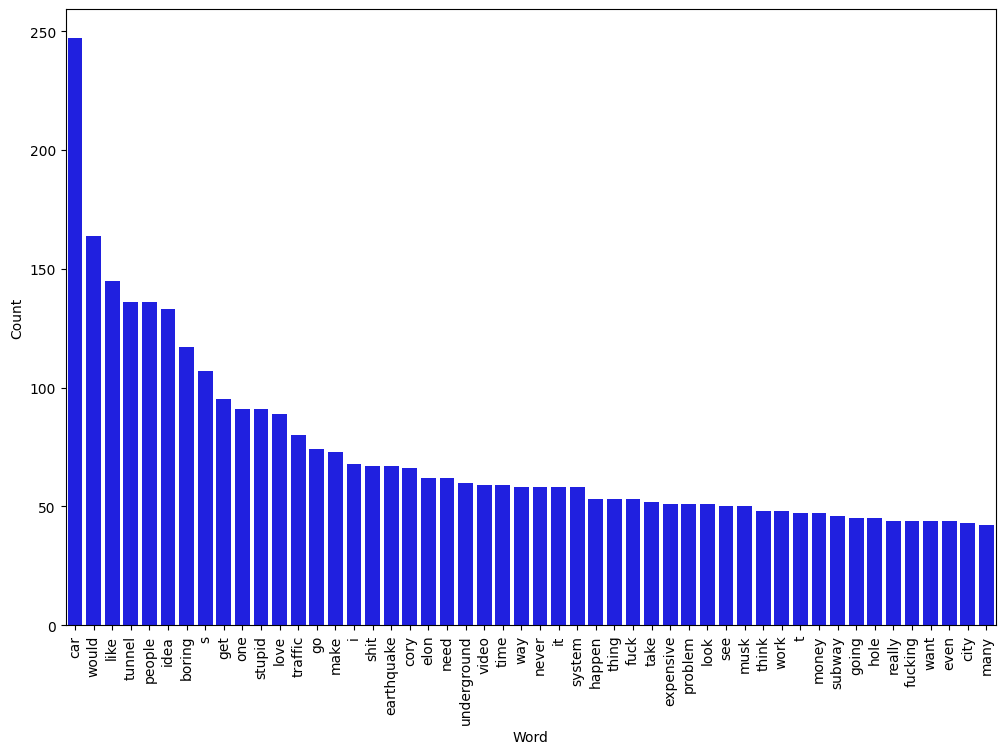

In [ ]:
counter(df[df["Sentiment"] == 1], "Comments", 50)

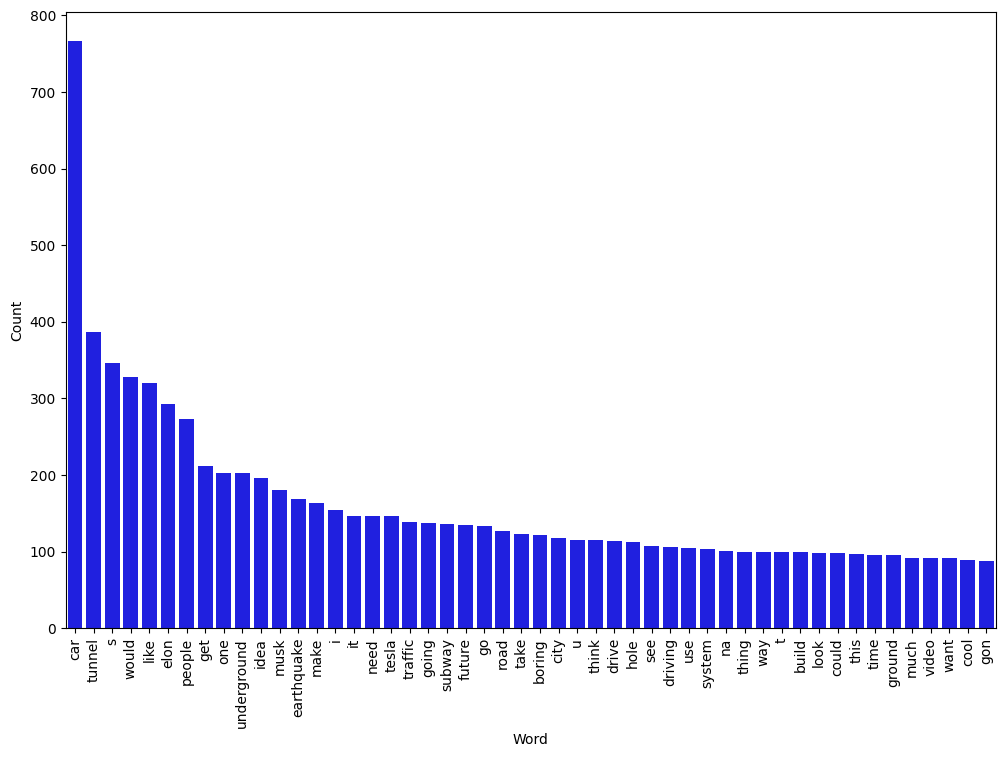

In [ ]:
counter(df[df["Sentiment"] == 0], "Comments", 50)

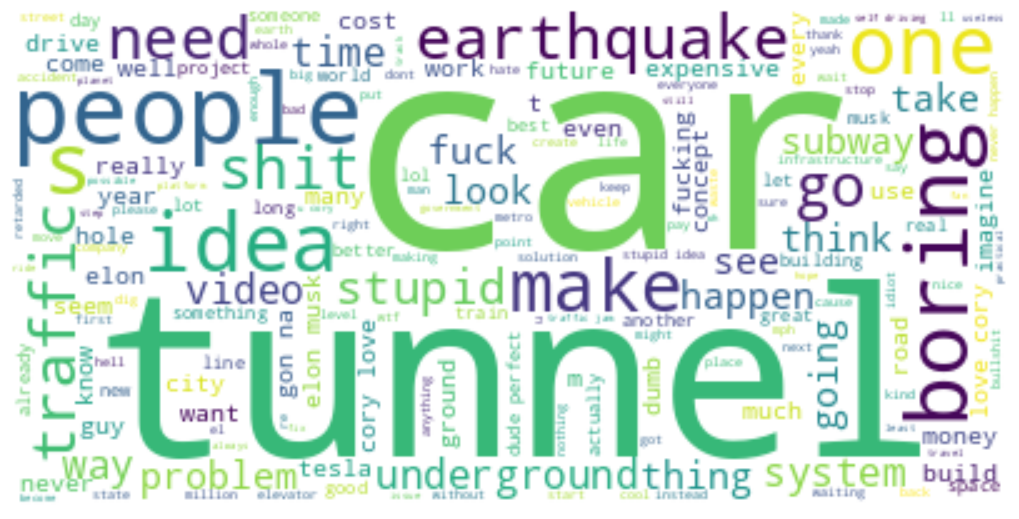

In [ ]:
from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(max_words = 500, stopwords = STOPWORDS,background_color = "white").generate(" ".join(df[df.Sentiment == 1].Comments))
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

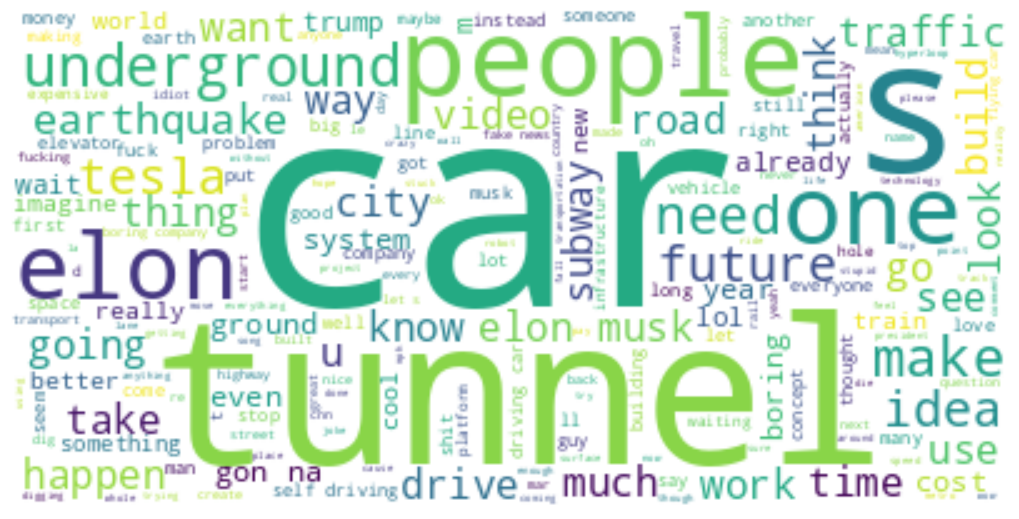

In [ ]:
from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(max_words = 500, stopwords = STOPWORDS, background_color = "white").generate(" ".join(df[df.Sentiment == 0].Comments))
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Plot Sentiment Distribution

In [ ]:
df['Sentiment'].value_counts()

0    3370
1    1298
Name: Sentiment, dtype: int64

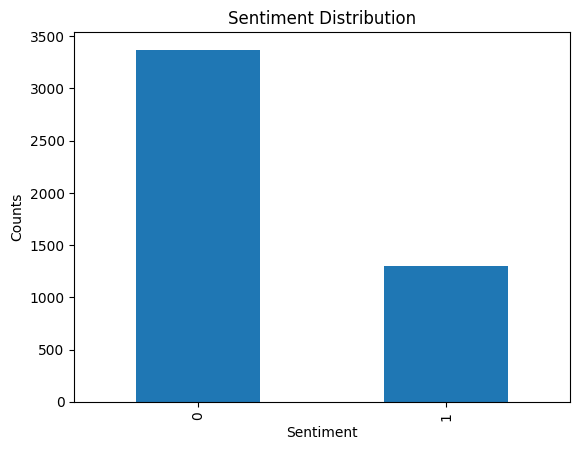

In [ ]:
value_counts = df['Sentiment'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Sentiment Distribution')
plt.show()

### Data Preprocessing

In [ ]:
# Preprocess the text data
texts = df['Comments'].tolist()
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
x = pad_sequences(sequences, maxlen=50)
y = df['Sentiment']

### Train Test Split

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Solving Class Imbalance Issue using SMOTE

In [ ]:
# # Apply SMOTE to the training set
# smote = SMOTE(sampling_strategy='minority')
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

### Solving Class Imbalance Issue using Random Over-Sampling Method

In [ ]:
# Perform oversampling to balance the class distribution
ros = RandomOverSampler(sampling_strategy='minority')
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

#### Plot Sentiment Distribution

In [ ]:
y_train_resampled.value_counts()

0    2697
1    2697
Name: Sentiment, dtype: int64

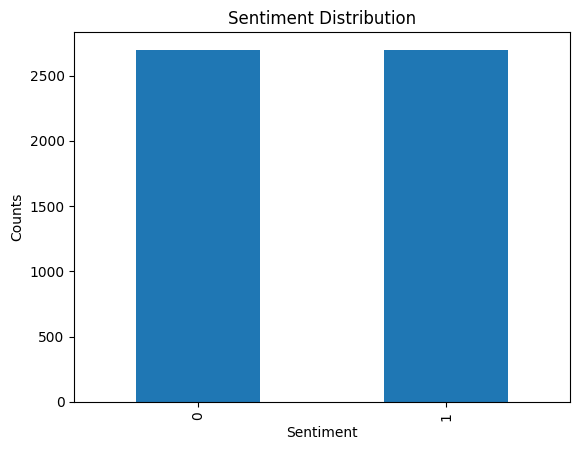

In [ ]:
value_counts = y_train_resampled.value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Sentiment Distribution')
plt.show()